# Fashion MNIST

**Context**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

**Content**

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


**Labels**

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


**TL;DR**

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

In [1]:
#Import our standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import Tensorflow, Keras and related libraries
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD,Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset 

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

In [3]:
# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Let's see how many rows are there
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


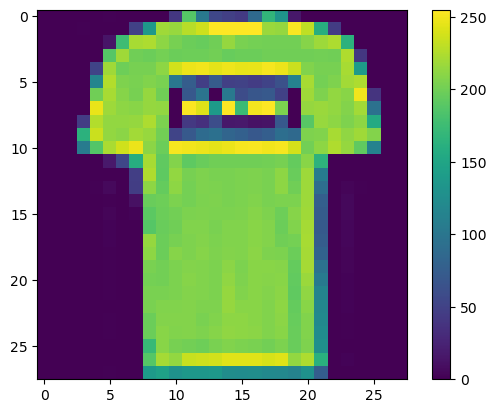

In [5]:
#Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [6]:
# Standardisation is important step
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

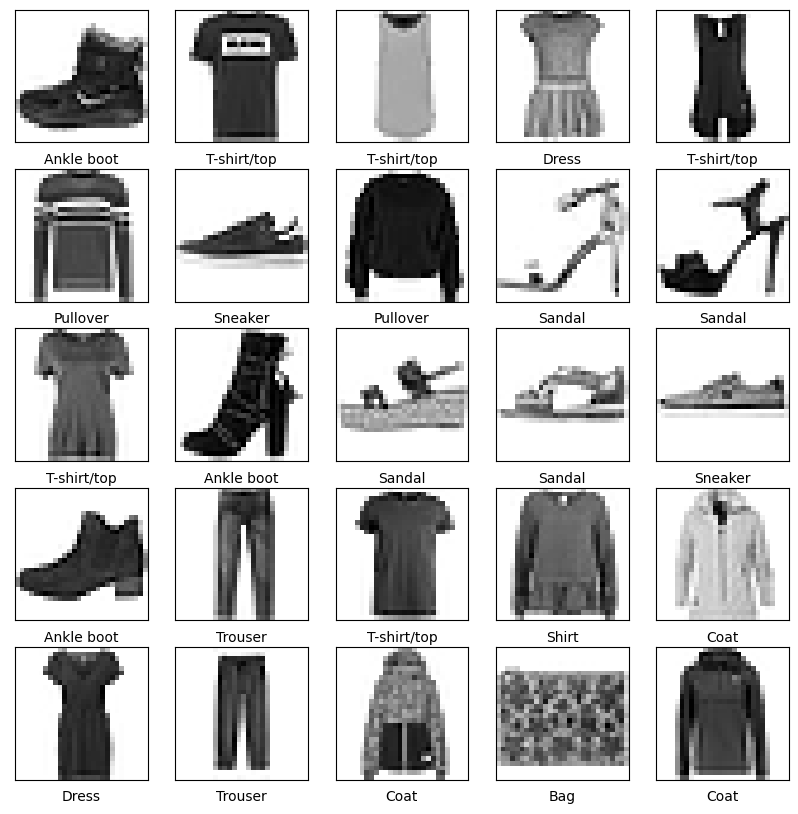

In [7]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

## 3-layer neural network

Build a simple 3 layer neural network with 1-input, 1-hidden and 1-output layer.

In [8]:
#Step 1 - Build the architecture
# Model a simple 3-layer neural network
model_3l = Sequential()

#Step 2: Create input, hidden and output layer
#for input layer, since our data is a 28*28 pixel array, I need to make it 1-D array. 
#Hence we need to use Flatten function instead of Dense
model_3l.add(Flatten(input_shape = (28,28)))

#for hidden layer, let's create 1 hidden layers with '128' neurons each and 'relu' activation function
#layer 1
model_3l.add(Dense(128, activation='relu'))

#As this is classfier, for output layer, we need 10 classes and use 'softmax' activation, 
model_3l.add(Dense(10, activation='softmax'))


In [9]:
#Print the model summary
model_3l.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


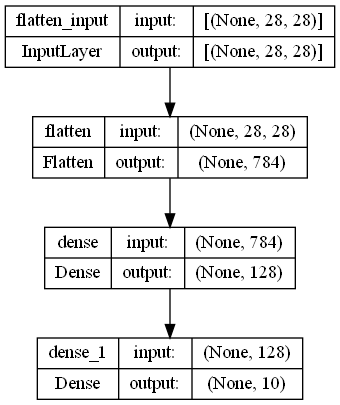

In [10]:
#if you want to visualise your model
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model_3l, to_file=dot_img_file, show_shapes=True)

In [11]:
#Step 3: Choose the optimiser and compile the model

#We will use Adam as the optimiser, with default learning rate
opt = Adam()

#Note that we did not convert the y_train to categorical. 
#Hence we can't use simple 'categorical_crossentropy' as loss function.
#We need to use 'sparse_categorical_crossentropy' as loss function. 
#Let's also print accuracy after each epoch

model_3l.compile(optimizer= opt,  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Step 4: Fit the neural network with X and y
# 5 epochs, and split the training set into 80/20 for validation
model_3l.fit(train_images, train_labels, epochs=5,  validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5199 - accuracy: 0.8176 - val_loss: 0.4084 - val_accuracy: 0.8550
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3902 - accuracy: 0.8593 - val_loss: 0.3737 - val_accuracy: 0.8636
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3491 - accuracy: 0.8724 - val_loss: 0.3794 - val_accuracy: 0.8615
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3205 - accuracy: 0.8834 - val_loss: 0.3483 - val_accuracy: 0.8762
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3020 - accuracy: 0.8886 - val_loss: 0.3377 - val_accuracy: 0.8787


__What is 1500?__

In [13]:
#Step 5 - Evaluate the model
test_loss, test_acc = model_3l.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 0s 863us/step - loss: 0.3662 - accuracy: 0.8673
Model - 3 layers - test loss: 36.6179496049881
Model - 3 layers - test accuracy: 86.72999739646912


_Test accuracy of **80%**! not bad for the first model!_

## 6-layer neural network

Now since we have seen the 3 layer NN model, let's up the game. Create a 6 layered neural network. 

We dont need to do much just copy the same code and add 3 more hidden layers

In [14]:
#Step 1 - Build the architecture
# Model a simple 3-layer neural network
model_6l = Sequential()

#Step 2: Create input, hidden and output layer
#for input layer, I will use 100 neurons, and sigmoid activation her
model_6l.add(Flatten(input_shape = (28,28)))

#for hidden layer, let's create 1 hidden layers with '128' neurons each and 'relu' activation function
#layer 1
model_6l.add(Dense(128, activation='relu'))
model_6l.add(Dense(128, activation='relu'))
model_6l.add(Dense(128, activation='relu'))
model_6l.add(Dense(128, activation='relu'))

#for output layer, we need 10 neurons and use 'softmax' activation, as this is classfier
model_6l.add(Dense(10, activation='softmax'))


In [15]:
#Step 3: Choose the optimiser and compile the model

#We will use Stochastic Gradient Descent as the optimiser, with default learning rate
opt = Adam()

#We use 'sparse_categorical_crossentropy' as loss function. Let's also print accuracy after each epoch
model_6l.compile(optimizer= opt,  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
#Step 4: Fit the neural network with X and y
# 5 epochs, and split the training set into 80/20 for validation
model_6l.fit(train_images, train_labels, epochs=5,  validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5184 - accuracy: 0.8144 - val_loss: 0.4076 - val_accuracy: 0.8508
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3834 - accuracy: 0.8594 - val_loss: 0.3850 - val_accuracy: 0.8580
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3454 - accuracy: 0.8728 - val_loss: 0.3399 - val_accuracy: 0.8758
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3227 - accuracy: 0.8817 - val_loss: 0.3430 - val_accuracy: 0.8804
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3027 - accuracy: 0.8879 - val_loss: 0.3507 - val_accuracy: 0.8735


In [17]:
#Step 5 - Evaluate the model
test_loss, test_acc = model_6l.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8678
Model - 6 layers - test loss: 38.18555772304535
Model - 6 layers - test accuracy: 86.77999973297119


_Hmmm! Model has improved its accuracy!_

## 12 layer nerual network

Now let's create even more deeper neural network with 12 layers. i.e. 10 hidden layers.

In [18]:
#Step 1 - Build the architecture
# Model a simple 3-layer neural network
model_12l = Sequential()

#Step 2: Create input, hidden and output layer
#for input layer, I will use 100 neurons, and sigmoid activation her
model_12l.add(Flatten(input_shape = (28,28)))

#for hidden layer, let's create 1 hidden layers with '128' neurons each and 'relu' activation function
#layer 1
model_12l.add(Dense(128, activation='relu'))
model_12l.add(Dense(128, activation='relu'))
model_12l.add(Dense(128, activation='relu'))
model_12l.add(Dense(128, activation='relu'))
model_12l.add(Dense(128, activation='relu'))
model_12l.add(Dense(128, activation='relu'))
model_12l.add(Dense(128, activation='relu'))
model_12l.add(Dense(128, activation='relu'))
model_12l.add(Dense(128, activation='relu'))
model_12l.add(Dense(128, activation='relu'))

#for output layer, we need 10 neurons and use 'softmax' activation, as this is classfier
model_12l.add(Dense(10, activation='softmax'))

In [19]:
#Step 3: Choose the optimiser and compile the model

#We will use Stochastic Gradient Descent as the optimiser, with default learning rate
opt = Adam()

#We use 'sparse_categorical_crossentropy' as loss function. Let's also print accuracy after each epoch
model_12l.compile(optimizer= opt,  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
#Step 4: Fit the neural network with X and y
# 5 epochs, and split the training set into 80/20 for validation
model_12l.fit(train_images, train_labels, epochs=5,  validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6287 - accuracy: 0.7688 - val_loss: 0.4461 - val_accuracy: 0.8362
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4396 - accuracy: 0.8434 - val_loss: 0.4227 - val_accuracy: 0.8378
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3968 - accuracy: 0.8574 - val_loss: 0.3848 - val_accuracy: 0.8644
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3690 - accuracy: 0.8667 - val_loss: 0.4164 - val_accuracy: 0.8612
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3554 - accuracy: 0.8720 - val_loss: 0.3887 - val_accuracy: 0.8630


In [21]:
#Step 5 - Evaluate the model
test_loss, test_acc = model_12l.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8510
Model - 12 layers - test loss: 41.40721559524536
Model - 12 layers - test accuracy: 85.10000109672546


_Okay! Looks like we are not making that much improvement. Let's try different kernal initializer_

In [22]:
#Step 1 - Build the architecture
# Model a simple 3-layer neural network
model_12l_k = Sequential()

#Step 2: Create input, hidden and output layer
#for input layer, I will use 100 neurons, and sigmoid activation her
model_12l_k.add(Flatten(input_shape = (28,28)))

#for hidden layer, let's create 1 hidden layers with '128' neurons each and 'relu' activation function
#change the kernel_initializer from glorot_uniform to random_normal
#layer 1
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model_12l_k.add(Dense(128, activation='relu', kernel_initializer='random_normal'))

#for output layer, we need 10 neurons and use 'softmax' activation, as this is classfier
model_12l_k.add(Dense(10, activation='softmax'))

In [23]:
#Step 3: Choose the optimiser and compile the model

#We will use Stochastic Gradient Descent as the optimiser, with default learning rate
opt = Adam()

#We use 'sparse_categorical_crossentropy' as loss function. Let's also print accuracy after each epoch
model_12l_k.compile(optimizer= opt,  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
#Step 4: Fit the neural network with X and y
# 5 epochs, and split the training set into 80/20 for validation
model_12l_k.fit(train_images, train_labels, epochs=5,  validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8221 - accuracy: 0.6669 - val_loss: 0.5215 - val_accuracy: 0.8022
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5139 - accuracy: 0.8082 - val_loss: 0.5393 - val_accuracy: 0.7946
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4574 - accuracy: 0.8401 - val_loss: 0.4397 - val_accuracy: 0.8502
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4223 - accuracy: 0.8538 - val_loss: 0.4094 - val_accuracy: 0.8657
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3943 - accuracy: 0.8642 - val_loss: 0.4276 - val_accuracy: 0.8568


In [25]:
#Step 5 - Evaluate the model
test_loss, test_acc = model_12l_k.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 1s 1ms/step - loss: 0.4577 - accuracy: 0.8467
Model - 12 layers - test loss: 45.77179551124573
Model - 12 layers - test accuracy: 84.67000126838684


_It appears, not much of change in accuracy_

## Try for 50 epochs

We have tried different number of hidden layers. Now let's try training the model little long.

Note that, I am not using EarlyStopping purposefully. But if you want you can add it. 

### 3 Layers, 50 epochs

In [26]:
# NN-3, 50 epochs 
history_NN3_50=model_3l.fit(train_images, train_labels, epochs=50, validation_split=0.2)


Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.8927 - val_loss: 0.3595 - val_accuracy: 0.8708
Epoch 2/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2706 - accuracy: 0.9010 - val_loss: 0.3153 - val_accuracy: 0.8863
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2608 - accuracy: 0.9045 - val_loss: 0.3216 - val_accuracy: 0.8872
Epoch 4/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2497 - accuracy: 0.9065 - val_loss: 0.3482 - val_accuracy: 0.8754
Epoch 5/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2402 - accuracy: 0.9109 - val_loss: 0.3217 - val_accuracy: 0.8898
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2318 - accuracy: 0.9135 - val_loss: 0.3189 - val_accuracy: 0.8878
Epoch 7/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2252 - accuracy: 0.9160 - val_loss: 0.3351 - val_accuracy:

In [27]:
#Evaluate the model and print the results
test_loss, test_acc = model_3l.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

  1/313 [..............................] - ETA: 6s - loss: 0.9516 - accuracy: 0.8750

313/313 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.8857
Model - 3 layers - test loss: 57.18637704849243
Model - 3 layers - test accuracy: 88.5699987411499


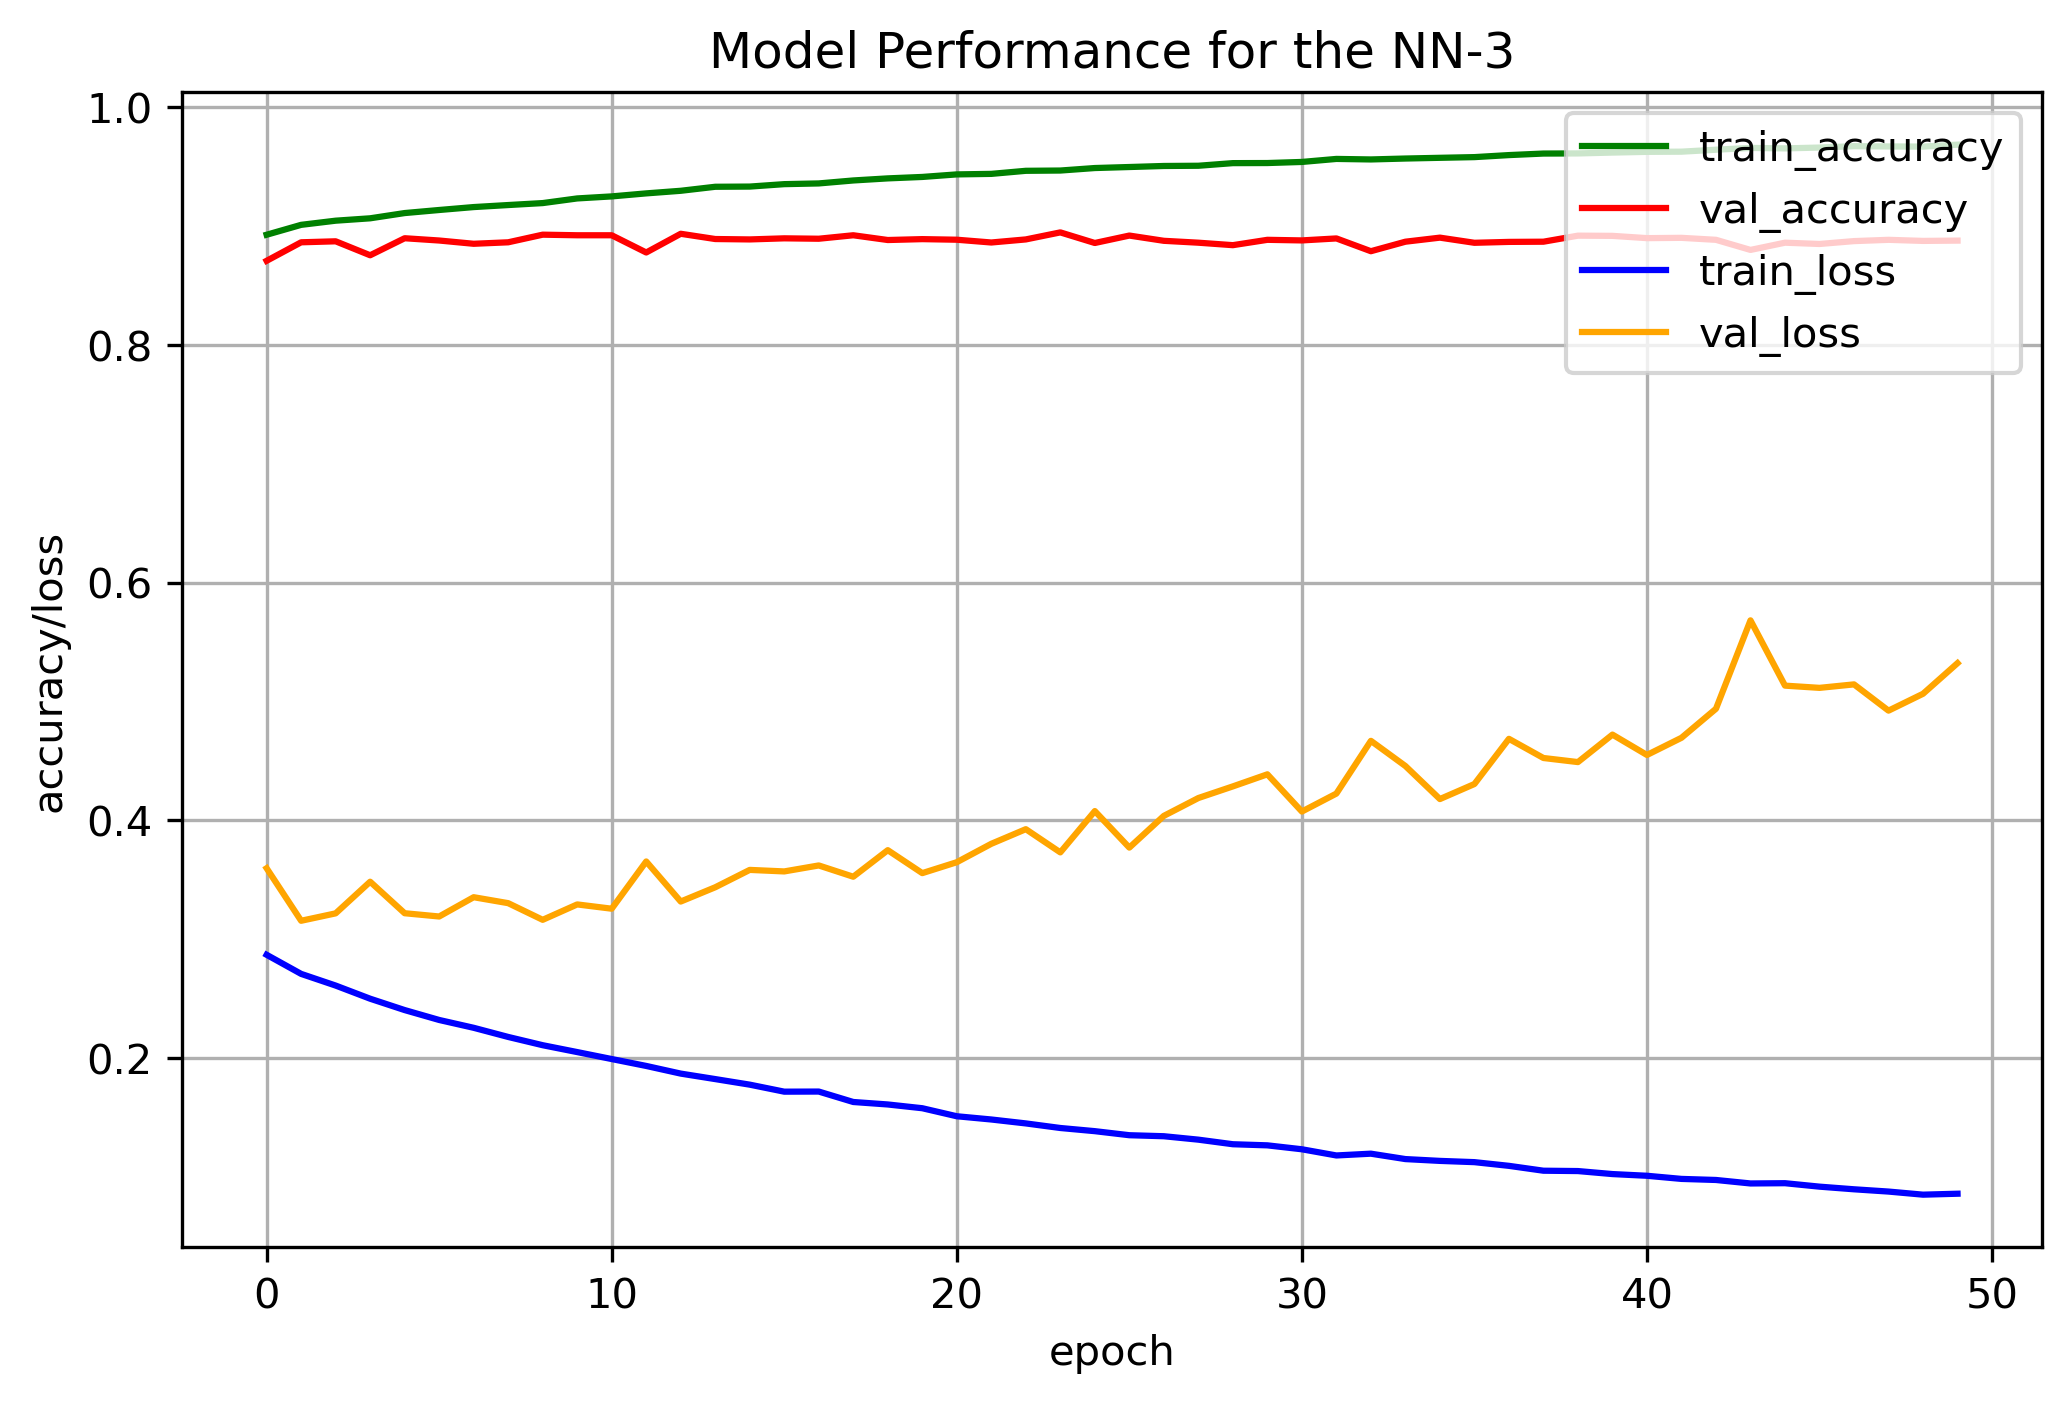

In [28]:
#Plot accuracy results for training data and testing data 
plt.figure(figsize=(8, 5), dpi = 300)
plt.plot(history_NN3_50.history['accuracy'], 'green')
plt.plot(history_NN3_50.history['val_accuracy'], 'red')
plt.plot(history_NN3_50.history['loss'], 'blue')
plt.plot(history_NN3_50.history['val_loss'], 'orange')
plt.grid(True)
plt.title('Model Performance for the NN-3')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy','train_loss', 'val_loss'], loc='upper right')
plt.show()

**What do you see?**

### 6 layers - 50 epochs

Try same for 6 layers..

In [29]:
# NN-6, 50 epochs
history_NN6_50=model_6l.fit(train_images, train_labels, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2877 - accuracy: 0.8919 - val_loss: 0.3213 - val_accuracy: 0.8846
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2747 - accuracy: 0.8970 - val_loss: 0.3435 - val_accuracy: 0.8764
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2644 - accuracy: 0.9011 - val_loss: 0.3285 - val_accuracy: 0.8810
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2521 - accuracy: 0.9054 - val_loss: 0.4180 - val_accuracy: 0.8669
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2475 - accuracy: 0.9070 - val_loss: 0.3216 - val_accuracy: 0.8876
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2379 - accuracy: 0.9109 - val_loss: 0.3300 - val_accuracy: 0.8827
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2317 - accuracy: 0.9133 - val_loss: 0.3284 - val_accuracy:

In [31]:
test_loss, test_acc = model_6l.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.8872
Model - 6 layers - test loss: 63.815319538116455
Model - 6 layers - test accuracy: 88.71999979019165


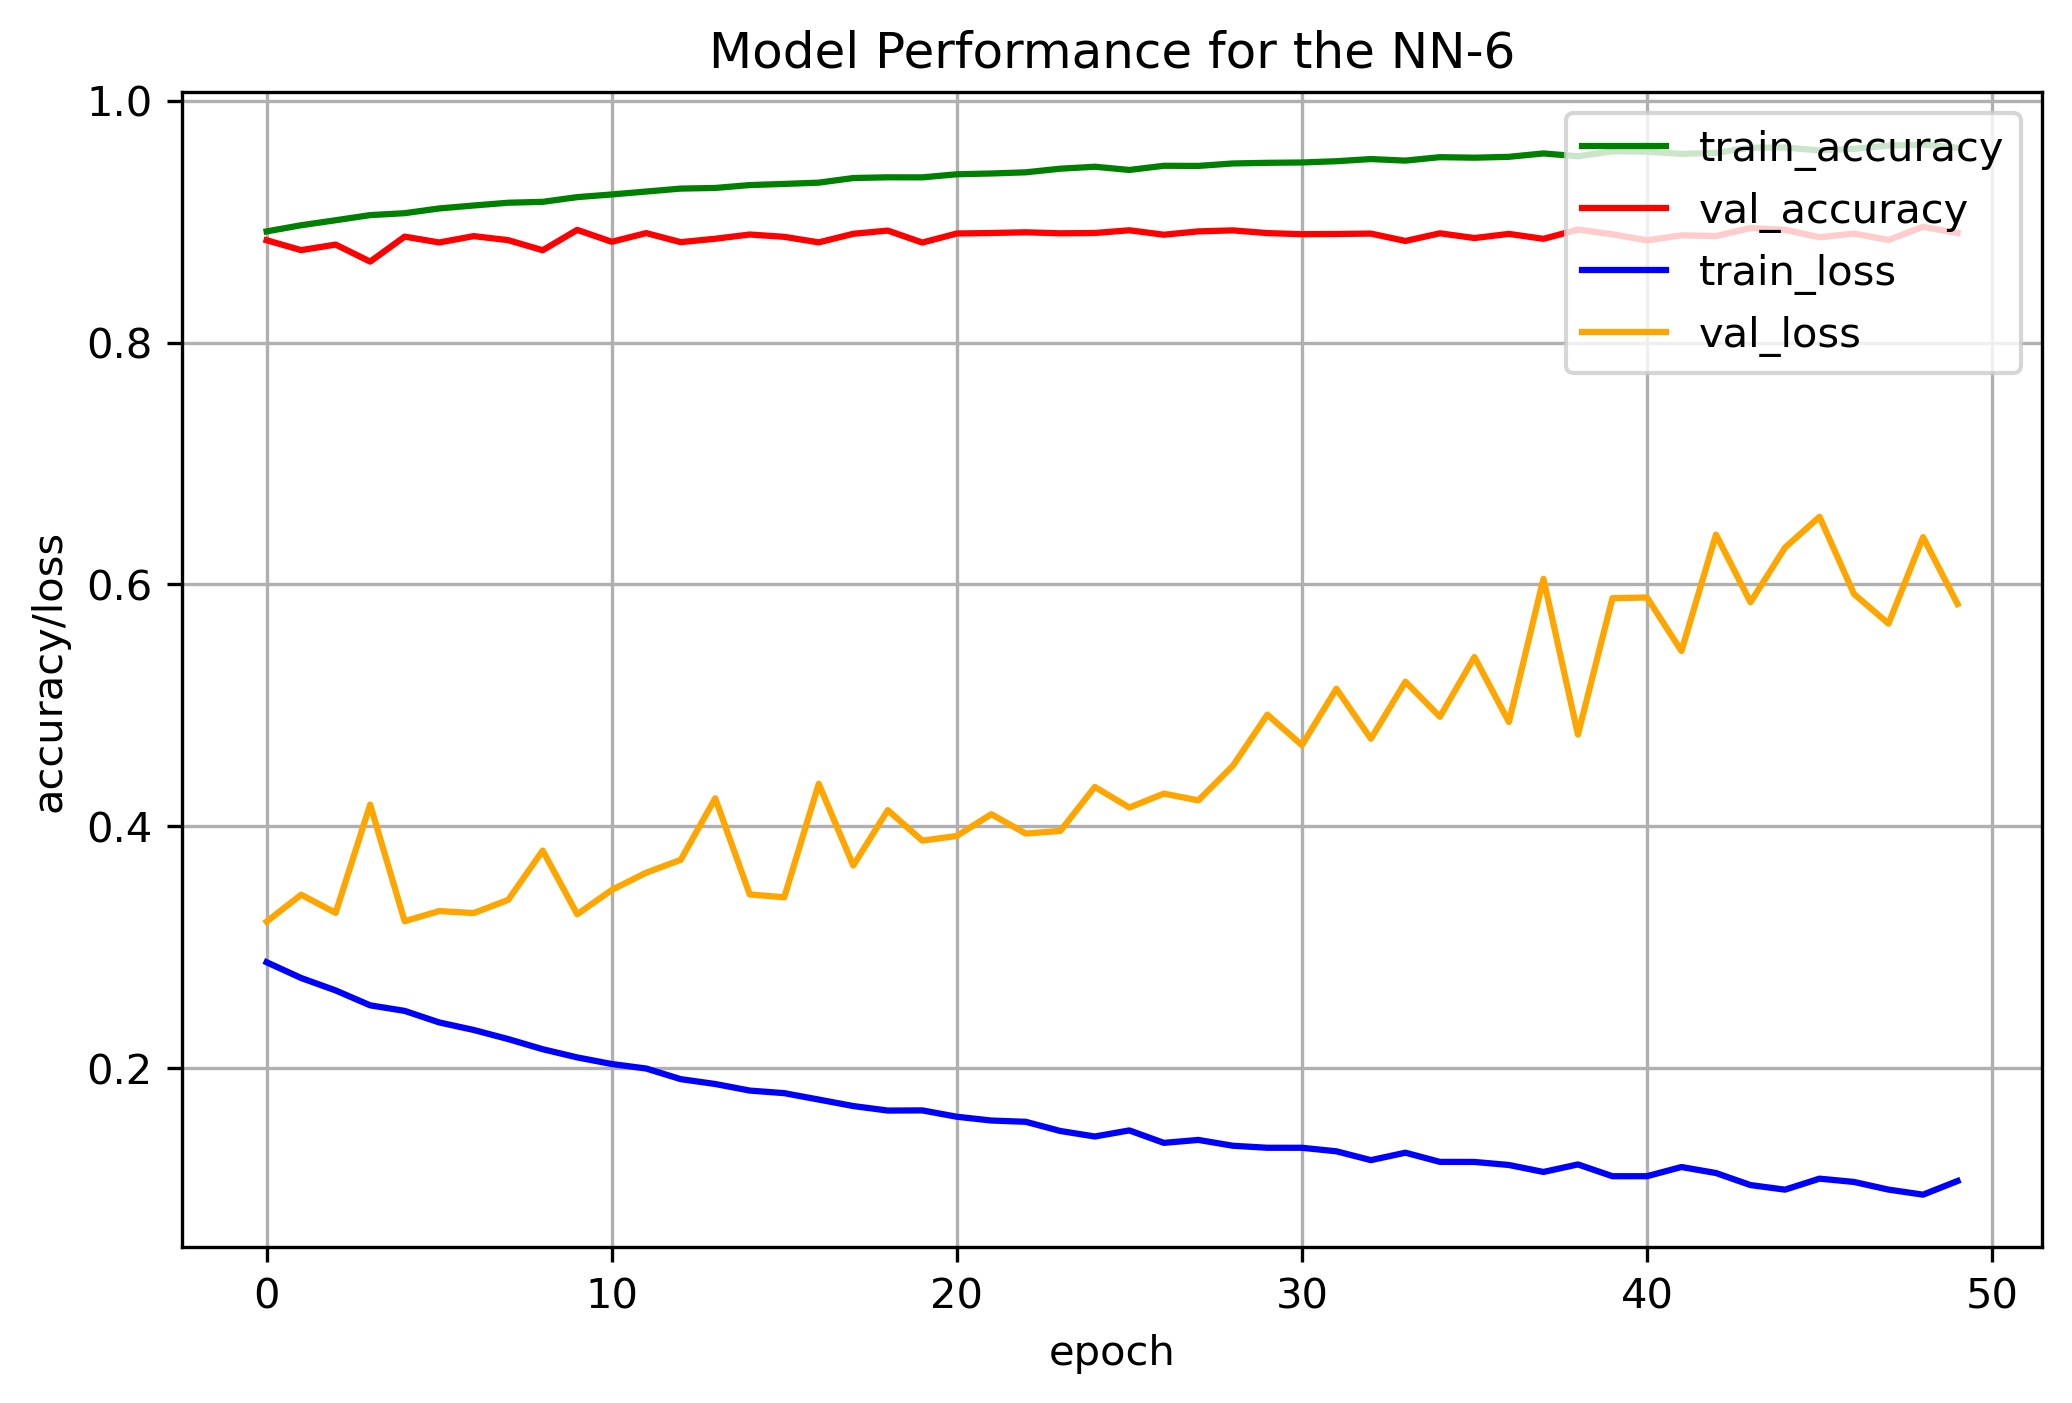

In [32]:
#Plot accuracy results for training data and testing data 
plt.figure(figsize=(8, 5), dpi = 300)
plt.grid(True)
plt.plot(history_NN6_50.history['accuracy'], 'green')
plt.plot(history_NN6_50.history['val_accuracy'], 'red')
plt.plot(history_NN6_50.history['loss'], 'blue')
plt.plot(history_NN6_50.history['val_loss'], 'orange')
plt.title('Model Performance for the NN-6')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy','train_loss', 'val_loss'], loc='upper right')

### 12 layers - 50 epochs

Now for 12 layers, use EarlyStopping


In [45]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

In [46]:
#NN - 12, 50 epochs
history_NN12_50=model_12l.fit(train_images, train_labels, epochs=50, 
                              validation_split=0.2,
                              callbacks = [early_stopping_monitor])

Epoch 1/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3705 - accuracy: 0.8690 - val_loss: 0.4030 - val_accuracy: 0.8599
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3633 - accuracy: 0.8707 - val_loss: 0.3901 - val_accuracy: 0.8561
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3485 - accuracy: 0.8768 - val_loss: 0.3829 - val_accuracy: 0.8708
Epoch 4/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3459 - accuracy: 0.8767 - val_loss: 0.3907 - val_accuracy: 0.8694
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3291 - accuracy: 0.8836 - val_loss: 0.3700 - val_accuracy: 0.8681
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3286 - accuracy: 0.8848 - val_loss: 0.3858 - val_accuracy: 0.8656
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3235 - accuracy: 0.8858 - val_loss: 0.3531 - val_accuracy:

In [47]:
test_loss, test_acc = model_12l.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.3755 - accuracy: 0.8716
Model - 12 layers - test loss: 37.54769265651703
Model - 12 layers - test accuracy: 87.15999722480774


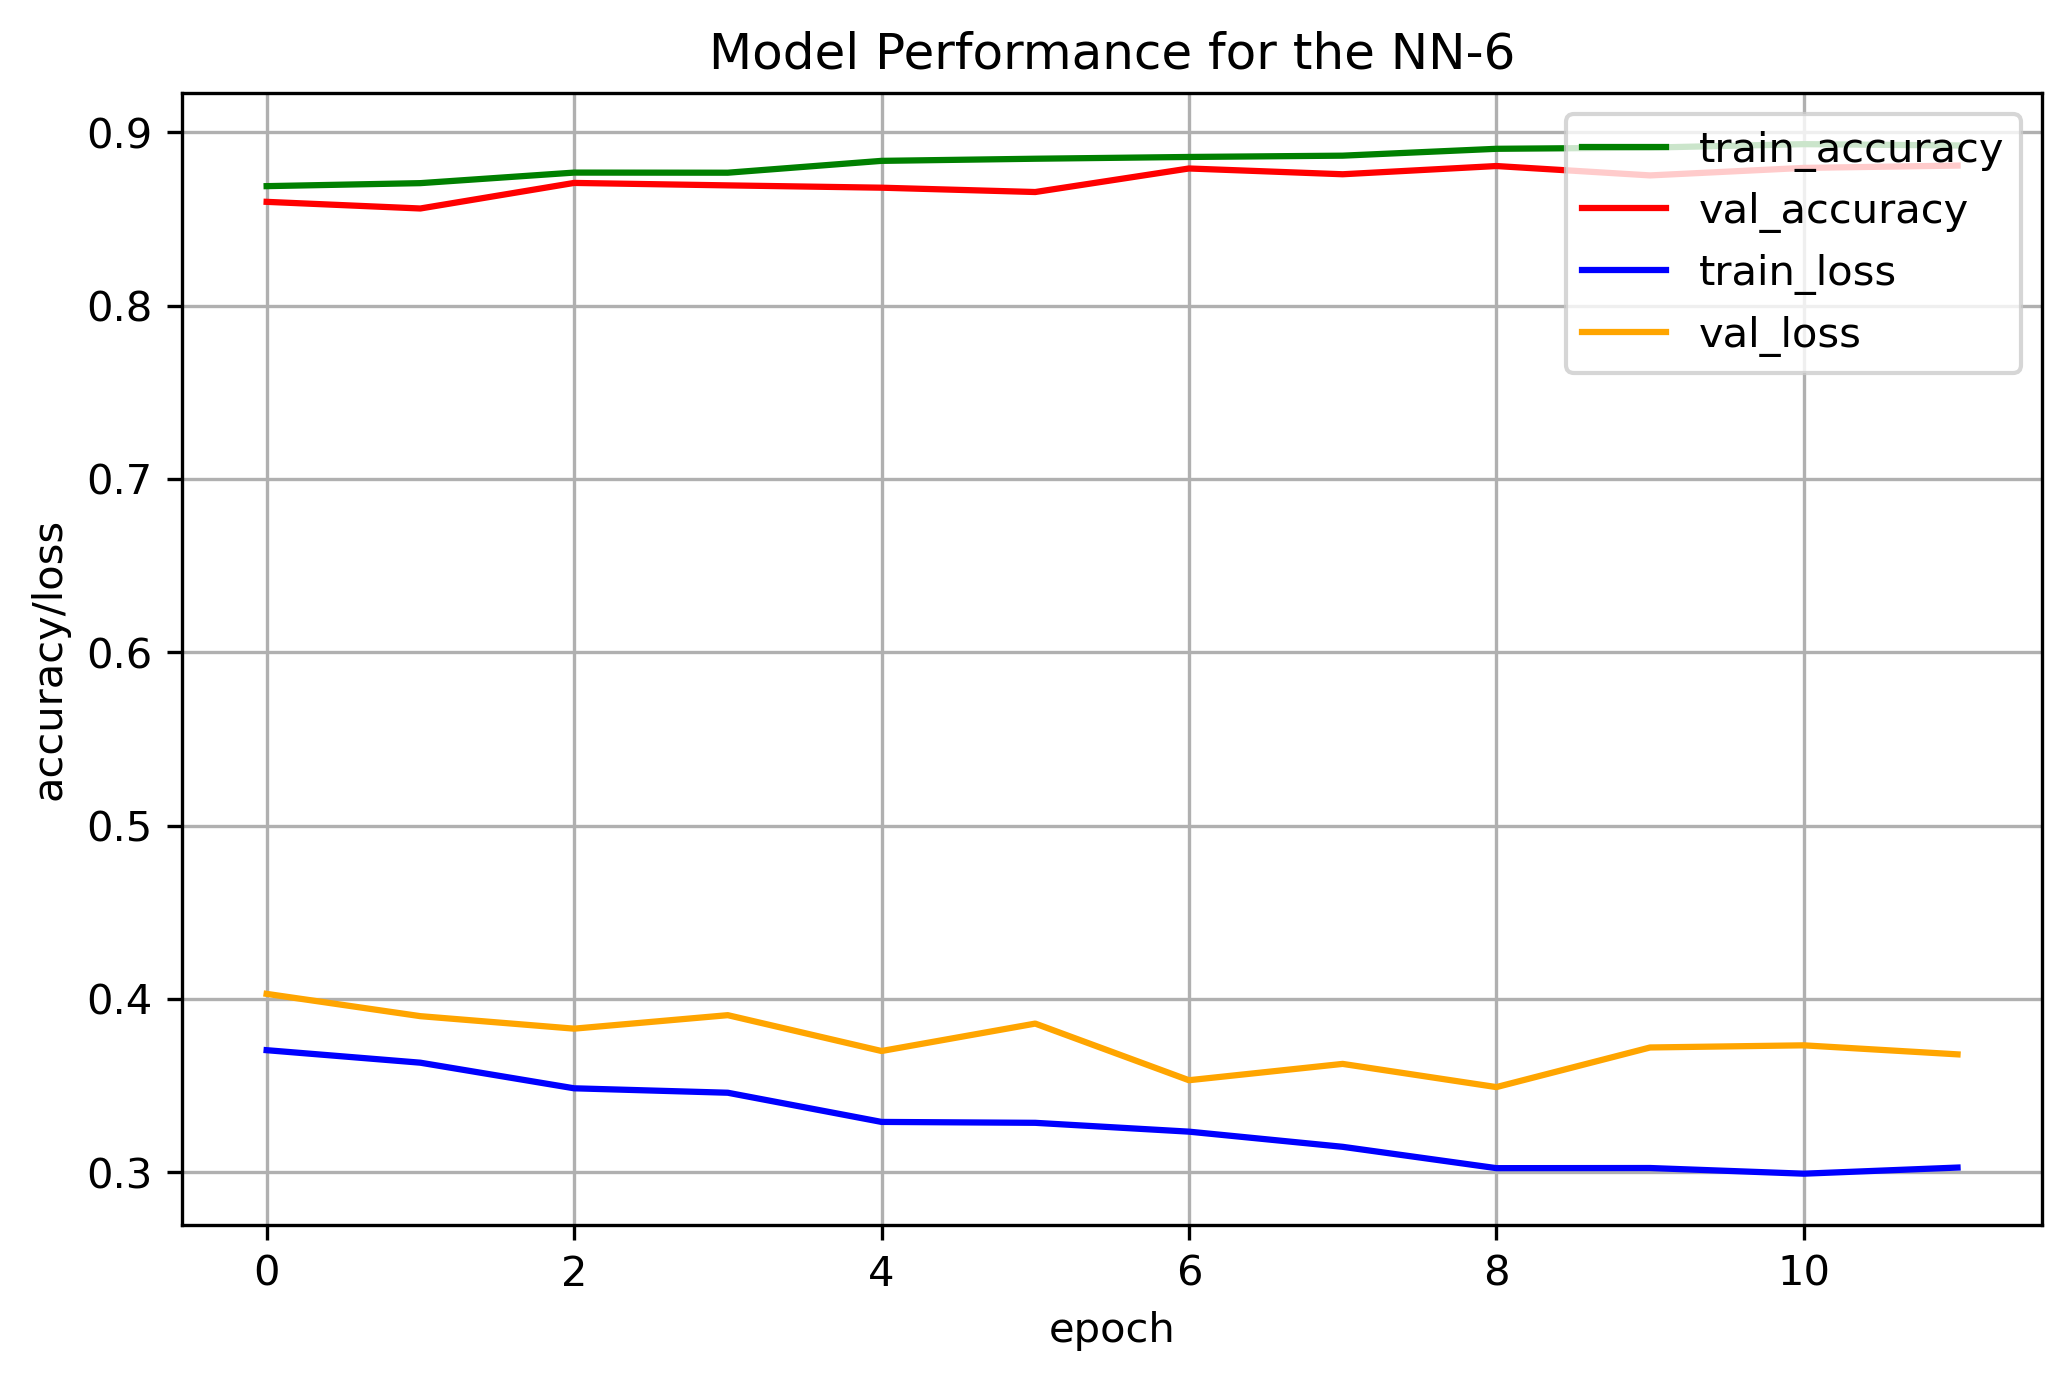

In [48]:
#Plot accuracy results for training data and testing data 
plt.figure(figsize=(8, 5), dpi = 300)
plt.grid(True)
plt.plot(history_NN12_50.history['accuracy'], 'green')
plt.plot(history_NN12_50.history['val_accuracy'], 'red')
plt.plot(history_NN12_50.history['loss'], 'blue')
plt.plot(history_NN12_50.history['val_loss'], 'orange')
plt.title('Model Performance for the NN-6')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy','train_loss', 'val_loss'], loc='upper right')

## Predictions

Now let's see how our predictions are actually working

In [33]:
# confidence of the 3L - model that the image corresponds to the label 
predictions = model_3l.predict(test_images)
predictions.shape #(10000, 10)


313/313 [==============================] - 0s 845us/step


(10000, 10)

In [34]:
#Predictions for the 0th image
predictions[0]

array([3.11959720e-16, 1.18401524e-17, 6.18268911e-20, 6.75862281e-27,
       1.41992077e-18, 3.12877475e-08, 4.40882763e-13, 2.39500378e-06,
       2.39089059e-14, 9.99997616e-01], dtype=float32)

In [35]:
#Max class
np.argmax(predictions[0])

9

In [36]:
#Class name for 9th class
class_names[9]

'Ankle boot'

In [37]:
#Ankle boot has the highest confidence value 
test_labels[0]

9

In [40]:
#Let's write some simple function to plot the image and confidence levels

# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

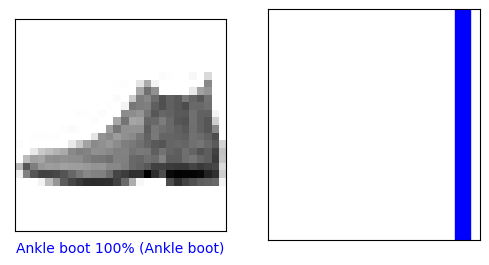

In [41]:
#Now let's look at 0th image, predictions, prediction array
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

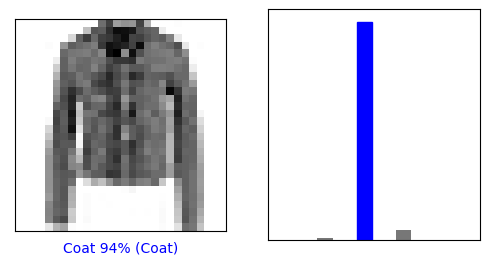

In [42]:
#Now let's look at 10th image, predictions, prediction array

i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

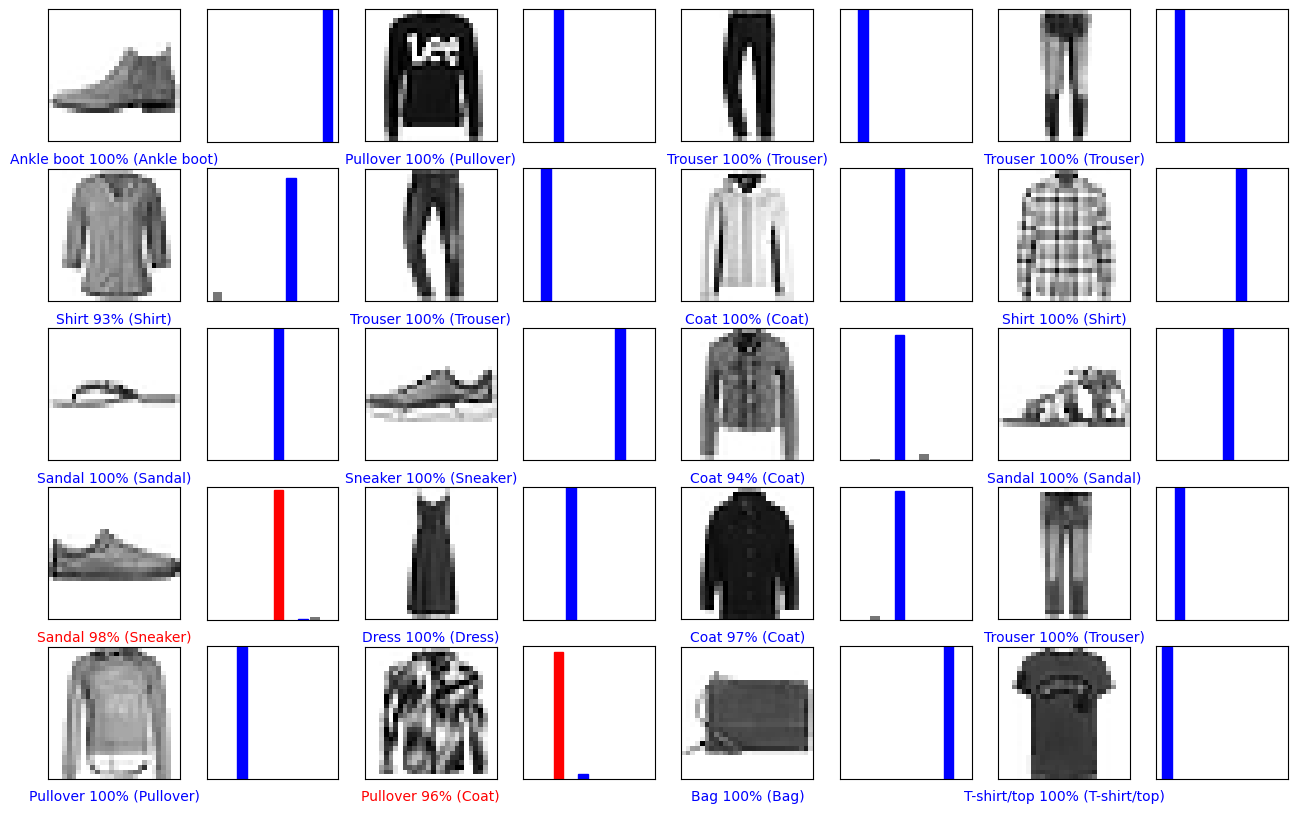

In [43]:
# Let's Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 15 images, with NN-3")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

_Hmmm, we can see where the model is getting confused... **Sandal vs Sneaker** and **T-shirt/top vs Coat**

In [44]:
#Let's do the same for 12-layer NN model

pred_12 = model_12l.predict(test_images)
pred_12.shape #(10000, 10)


313/313 [==============================] - 0s 949us/step


(10000, 10)

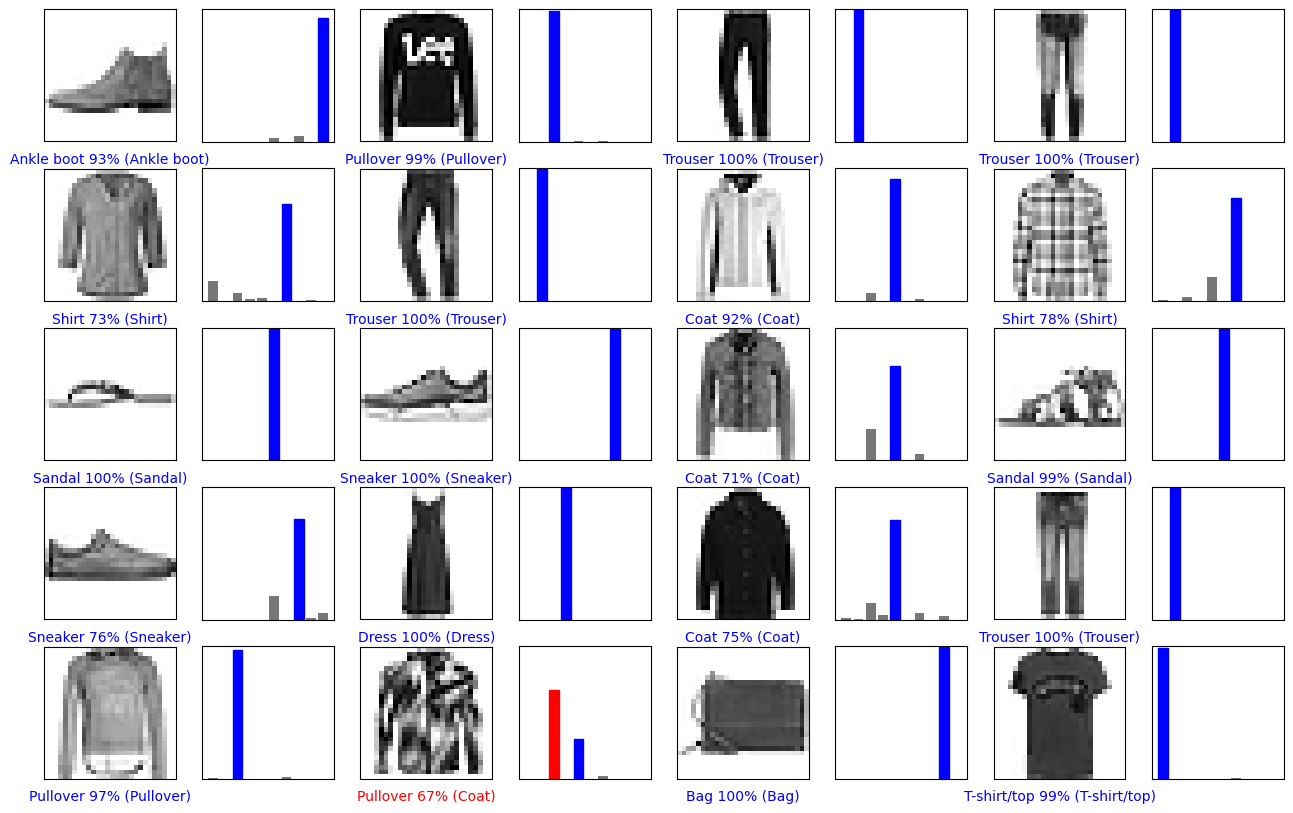

In [45]:
# Let's Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 15 images, with NN-3")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_12, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_12, test_labels)

_This model is somewhat better in terms of the Sneaker and Sanda. Still struggling with Coat and Pullover_